### DATASET FETCH

In [52]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris_Dataset = fetch_ucirepo(id=53)
breast_Cancer = fetch_ucirepo(id=17)

### DATA PREPARATION AND INSPECTION WITH PANDAS

In [ ]:
!pip install pandas

import pandas as pd

X=pd.DataFrame(iris_Dataset.data.features,columns=iris_Dataset.data.feature_names)
Y=pd.DataFrame(iris_Dataset.data.targets,columns=iris_Dataset.data.target_names)

x=pd.DataFrame(breast_Cancer.data.features,columns=breast_Cancer.data.feature_names)
y=pd.DataFrame(breast_Cancer.data.targets,columns=breast_Cancer.data.target_names)

iris_dataset=pd.concat([X,Y],axis=1)
iris_dataset.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
breast_cancer=pd.concat([x,y],axis=1)
breast_cancer.tail()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


### MULTINOMIAL NB ( IRIS DATASET )

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=2)

mnb_classifier = MultinomialNB(alpha=2.5, fit_prior=True, class_prior=None).fit(X_train, Y_train.values.ravel())

Y_pred=mnb_classifier.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print("=========================================")
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Accuracy Score:
0.9666666666666667
Confusion Matrix:
[[14  0  0]
 [ 0  8  0]
 [ 0  1  7]]
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.40,random_state=2)  #testData 90% so trainData decreases ,so accuracy decreases

mnb_classifier = MultinomialNB(alpha=2.5, fit_prior=True, class_prior=None).fit(X_train, Y_train.values.ravel())

Y_pred=mnb_classifier.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print("=========================================")
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Accuracy Score:
0.7333333333333333
Confusion Matrix:
[[23  0  0]
 [ 0 16  0]
 [ 0 16  5]]
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.50      1.00      0.67        16
 Iris-virginica       1.00      0.24      0.38        21

       accuracy                           0.73        60
      macro avg       0.83      0.75      0.68        60
   weighted avg       0.87      0.73      0.70        60



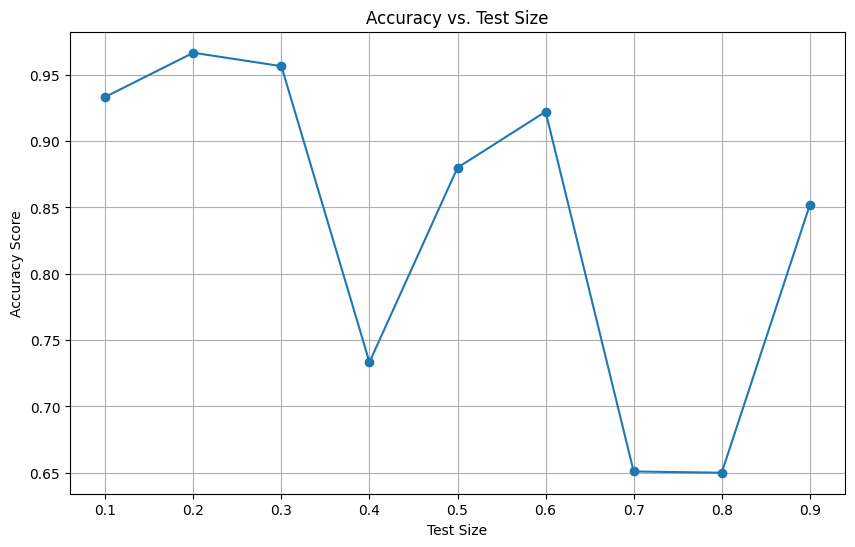

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

test_sizes = np.arange(0.1, 1.0, 0.1)

accuracy_scores = []

for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=2)
    mnb_classifier = MultinomialNB(alpha=2.5, fit_prior=True, class_prior=None).fit(X_train, Y_train.values.ravel())
    Y_pred = mnb_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.xticks(test_sizes)
plt.savefig('Iris_MNB_accuracy_vs_test_size.png')

### MULTINOMIAL NB ( BREAST CANCER DATASET )

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.10,random_state=2)

mnb_classifier = MultinomialNB(alpha=2.5, fit_prior=True, class_prior=None).fit(X_train, Y_train.values.ravel())

Y_pred=mnb_classifier.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print("=========================================")
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Accuracy Score:
0.9122807017543859
Confusion Matrix:
[[36  3]
 [ 2 16]]
Performance Evaluation:
              precision    recall  f1-score   support

           B       0.95      0.92      0.94        39
           M       0.84      0.89      0.86        18

    accuracy                           0.91        57
   macro avg       0.89      0.91      0.90        57
weighted avg       0.91      0.91      0.91        57



In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=2)  #testData 90% so trainData decreases ,so accuracy decreases

mnb_classifier = MultinomialNB(alpha=2.5, fit_prior=True, class_prior=None).fit(X_train, Y_train.values.ravel())

Y_pred=mnb_classifier.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print("=========================================")
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Accuracy Score:
0.8771929824561403
Confusion Matrix:
[[63  6]
 [ 8 37]]
Performance Evaluation:
              precision    recall  f1-score   support

           B       0.89      0.91      0.90        69
           M       0.86      0.82      0.84        45

    accuracy                           0.88       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



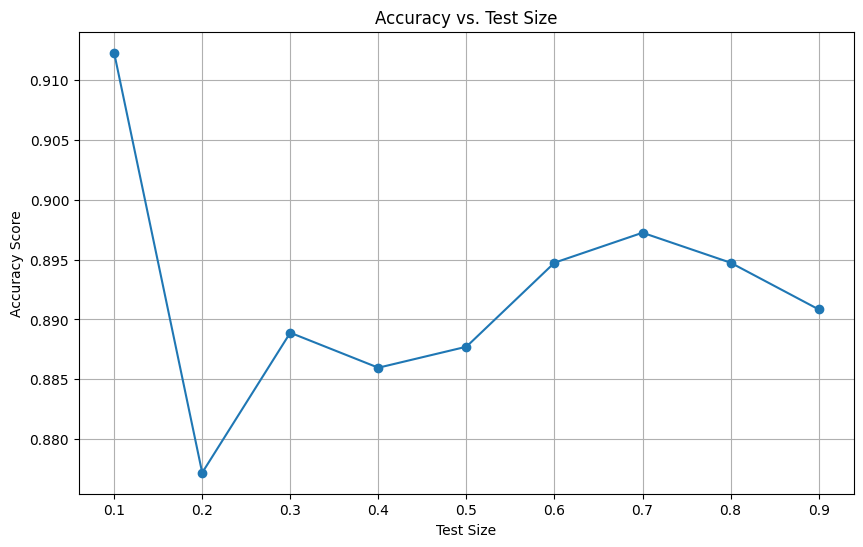

In [ ]:
test_sizes = np.arange(0.1, 1.0, 0.1)

accuracy_scores = []

for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=2)
    mnb_classifier = MultinomialNB(alpha=2.5, fit_prior=True, class_prior=None).fit(X_train, Y_train.values.ravel())
    Y_pred = mnb_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.savefig('Breast_MNB_accuracy_vs_test_size.png')

### GAUSSIAN NB (IRIS DATASET)

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=2)
gnb_classifier=GaussianNB(priors=None, var_smoothing=1e-05).fit(X_train,Y_train.values.ravel())
Y_pred=gnb_classifier.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print("=========================================")
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Accuracy Score:
0.9666666666666667
Confusion Matrix:
[[ 9  0  0]
 [ 0 11  0]
 [ 0  1  9]]
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.40,random_state=2)
gnb_classifier=GaussianNB(priors=None, var_smoothing=1e-05).fit(X_train,Y_train.values.ravel())
Y_pred=gnb_classifier.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print("=========================================")
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Accuracy Score:
0.9333333333333333
Confusion Matrix:
[[23  0  0]
 [ 0 15  1]
 [ 0  3 18]]
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.95      0.86      0.90        21

       accuracy                           0.93        60
      macro avg       0.93      0.93      0.93        60
   weighted avg       0.94      0.93      0.93        60



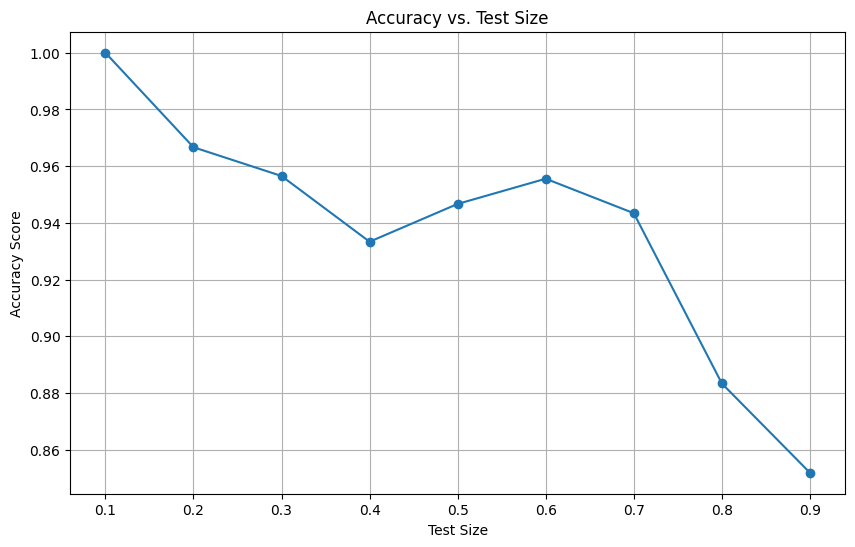

In [ ]:
test_sizes = np.arange(0.1, 1.0, 0.1)

accuracy_scores = []

for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=2)
    gnb_classifier = GaussianNB().fit(X_train, Y_train.values.ravel())
    Y_pred = gnb_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.xticks(test_sizes)
plt.savefig('Iris_GNB_accuracy_vs_test_size.png')

###GAUSSIAN NB ( BREAST CANCER DATASET )

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=2)
gnb_classifier=GaussianNB(priors=None, var_smoothing=1e-05).fit(X_train,Y_train.values.ravel())
Y_pred=gnb_classifier.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print("=========================================")
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Accuracy Score:
0.9298245614035088
Confusion Matrix:
[[66  3]
 [ 5 40]]
Performance Evaluation:
              precision    recall  f1-score   support

           B       0.93      0.96      0.94        69
           M       0.93      0.89      0.91        45

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.40,random_state=2)
gnb_classifier=GaussianNB(priors=None, var_smoothing=1e-05).fit(X_train,Y_train.values.ravel())
Y_pred=gnb_classifier.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print("=========================================")
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Accuracy Score:
0.9210526315789473
Confusion Matrix:
[[136   4]
 [ 14  74]]
Performance Evaluation:
              precision    recall  f1-score   support

           B       0.91      0.97      0.94       140
           M       0.95      0.84      0.89        88

    accuracy                           0.92       228
   macro avg       0.93      0.91      0.91       228
weighted avg       0.92      0.92      0.92       228



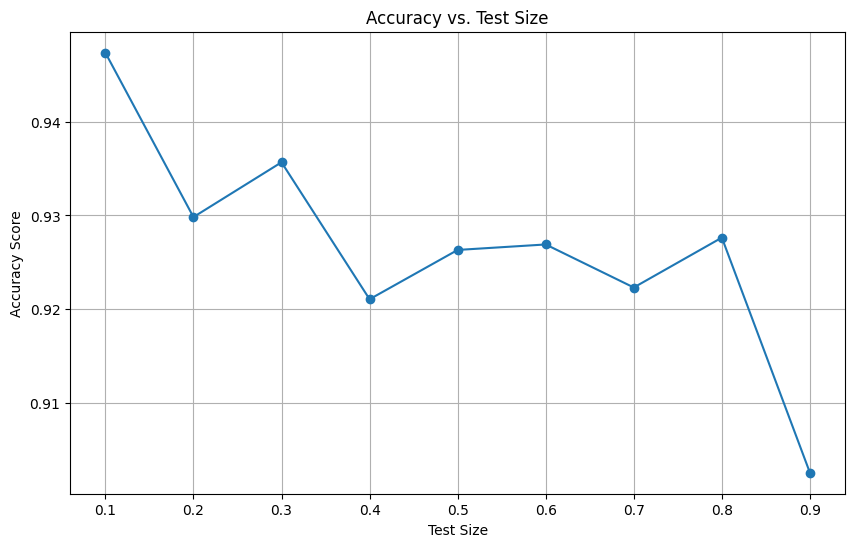

In [ ]:
test_sizes = np.arange(0.1, 1.0, 0.1)
accuracy_scores = []
for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=2)
    gnb_classifier = GaussianNB(priors=None, var_smoothing=1e-05).fit(X_train, Y_train.values.ravel())
    Y_pred = gnb_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.xticks(test_sizes)
plt.savefig('Breast_GNB_accuracy_vs_test_size.png')

### BERNOULLI NB (IRIS DATASET)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=2)
bnb_classifier=BernoulliNB(alpha=1.1, binarize=1.7,fit_prior=True,class_prior=None).fit(X_train,Y_train.values.ravel()) # train the model
Y_pred=bnb_classifier.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print("=========================================")
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Accuracy Score:
0.9333333333333333
Confusion Matrix:
[[15  2  0]
 [ 0 15  0]
 [ 0  1 12]]
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.88      0.94        17
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45



In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.40,random_state=2)
bnb_classifier=BernoulliNB(alpha=1.1, binarize=1.7,fit_prior=True,class_prior=None).fit(X_train,Y_train.values.ravel()) # train the model
Y_pred=bnb_classifier.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print("=========================================")
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Accuracy Score:
0.9
Confusion Matrix:
[[21  2  0]
 [ 0 16  0]
 [ 0  4 17]]
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.91      0.95        23
Iris-versicolor       0.73      1.00      0.84        16
 Iris-virginica       1.00      0.81      0.89        21

       accuracy                           0.90        60
      macro avg       0.91      0.91      0.90        60
   weighted avg       0.93      0.90      0.90        60



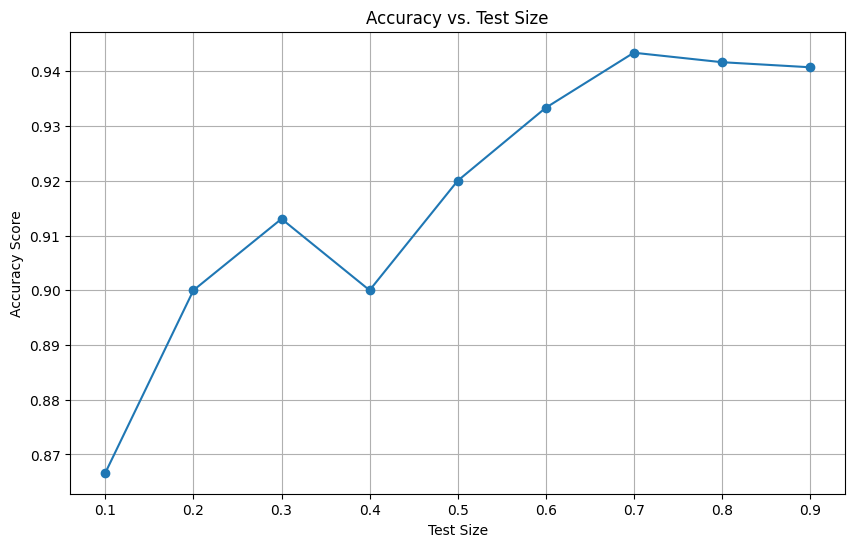

In [ ]:
test_sizes = np.arange(0.1, 1.0, 0.1)
accuracy_scores = []
for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=2)
    bnb_classifier = BernoulliNB(alpha=1.1, binarize=1.7, fit_prior=True, class_prior=None).fit(X_train, Y_train.values.ravel())
    Y_pred = bnb_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.xticks(test_sizes)
plt.savefig('Iris_BNB_accuracy_vs_test_size.png')

###BERNOULLI NB ( BREAST CANCER DATASET )

In [ ]:
from sklearn.naive_bayes import BernoulliNB
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=2)
bnb_classifier=BernoulliNB(alpha=1.1, binarize=1.7,fit_prior=True,class_prior=None).fit(X_train,Y_train.values.ravel()) # train the model
Y_pred=bnb_classifier.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print("=========================================")
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Accuracy Score:
0.6140350877192983
Confusion Matrix:
[[104   0]
 [ 66   1]]
Performance Evaluation:
              precision    recall  f1-score   support

           B       0.61      1.00      0.76       104
           M       1.00      0.01      0.03        67

    accuracy                           0.61       171
   macro avg       0.81      0.51      0.39       171
weighted avg       0.76      0.61      0.47       171



In [ ]:
from sklearn.naive_bayes import BernoulliNB
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.60,random_state=2)
bnb_classifier=BernoulliNB(alpha=1.1, binarize=1.7,fit_prior=True,class_prior=None).fit(X_train,Y_train.values.ravel()) # train the model
Y_pred=bnb_classifier.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print("=========================================")
dt_cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(dt_cm)
print("=========================================")
print("=========================================")
print("Performance Evaluation:")
print(classification_report(Y_test,Y_pred))

Accuracy Score:
0.6081871345029239
Confusion Matrix:
[[207   0]
 [134   1]]
Performance Evaluation:
              precision    recall  f1-score   support

           B       0.61      1.00      0.76       207
           M       1.00      0.01      0.01       135

    accuracy                           0.61       342
   macro avg       0.80      0.50      0.39       342
weighted avg       0.76      0.61      0.46       342



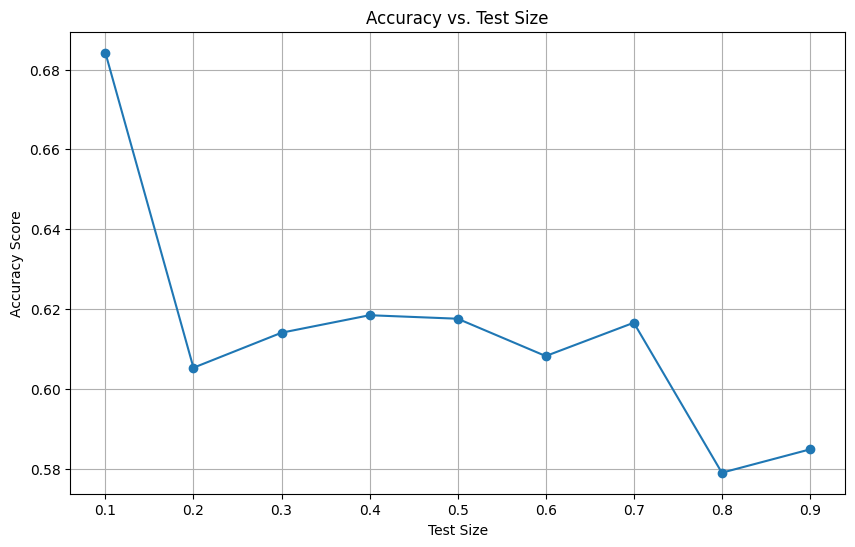

In [ ]:
test_sizes = np.arange(0.1, 1.0, 0.1)
accuracy_scores = []
for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=2)
    bnb_classifier = BernoulliNB(alpha=1.1, binarize=1.7, fit_prior=True, class_prior=None).fit(X_train, Y_train.values.ravel())
    Y_pred = bnb_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.xticks(test_sizes)
plt.savefig('Breast_BNB_accuracy_vs_test_size.png')

###DECISION TREE (IRIS DATASET)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
DescisionClassifier=DecisionTreeClassifier().fit(X_train,Y_train)
Y_predict=DescisionClassifier.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, Y_predict))
print("==================================================")
print("Confusion Matrix:\n",confusion_matrix(Y_test, Y_predict))
print("==================================================")
print("Classification Report:\n",classification_report(Y_test, Y_predict))

Accuracy Score:  0.9333333333333333
Confusion Matrix:
 [[14  0  0]
 [ 0  7  1]
 [ 0  1  7]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=2)
DescisionClassifier=DecisionTreeClassifier().fit(X_train,Y_train)
Y_predict=DescisionClassifier.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, Y_predict))
print("==================================================")
print("Confusion Matrix:\n",confusion_matrix(Y_test, Y_predict))
print("==================================================")
print("Classification Report:\n",classification_report(Y_test, Y_predict))

Accuracy Score:  0.9166666666666666
Confusion Matrix:
 [[39  0  0]
 [ 0 38  1]
 [ 0  9 33]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.81      0.97      0.88        39
 Iris-virginica       0.97      0.79      0.87        42

       accuracy                           0.92       120
      macro avg       0.93      0.92      0.92       120
   weighted avg       0.93      0.92      0.92       120



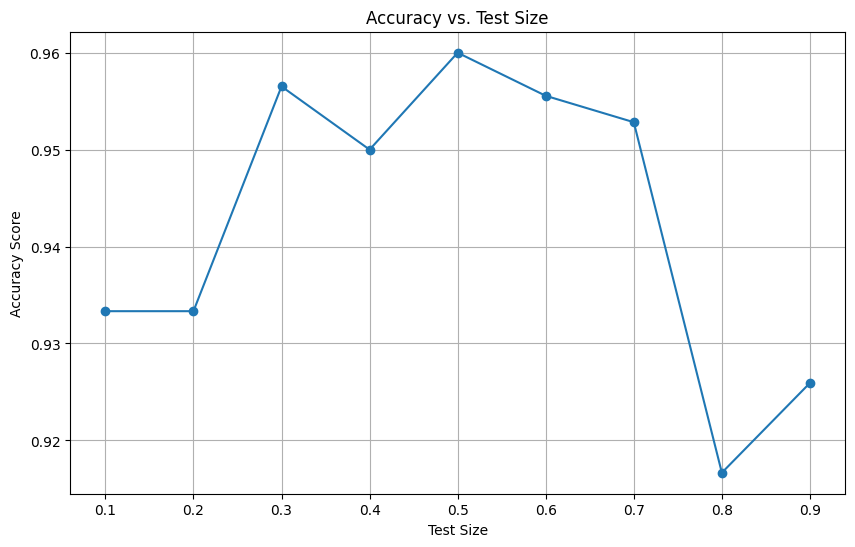

In [ ]:
test_sizes = np.arange(0.1, 1.0, 0.1)
accuracy_scores = []
for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=2)
    DescisionClassifier=DecisionTreeClassifier().fit(X_train,Y_train)
    Y_pred = DescisionClassifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.xticks(test_sizes)
plt.savefig('Iris_DT_accuracy_vs_test_size.png')

###DECISION TREE ( BREAST CANCER DATASET )

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)
DescisionClassifier=DecisionTreeClassifier().fit(X_train,Y_train)
Y_predict=DescisionClassifier.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, Y_predict))
print("==================================================")
print("Confusion Matrix:\n",confusion_matrix(Y_test, Y_predict))
print("==================================================")
print("Classification Report:\n",classification_report(Y_test, Y_predict))

Accuracy Score:  0.9298245614035088
Confusion Matrix:
 [[62  7]
 [ 1 44]]
Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.90      0.94        69
           M       0.86      0.98      0.92        45

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4, random_state=2)
DescisionClassifier=DecisionTreeClassifier().fit(X_train,Y_train)
Y_predict=DescisionClassifier.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, Y_predict))
print("==================================================")
print("Confusion Matrix:\n",confusion_matrix(Y_test, Y_predict))
print("==================================================")
print("Classification Report:\n",classification_report(Y_test, Y_predict))

Accuracy Score:  0.9078947368421053
Confusion Matrix:
 [[126  14]
 [  7  81]]
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.90      0.92       140
           M       0.85      0.92      0.89        88

    accuracy                           0.91       228
   macro avg       0.90      0.91      0.90       228
weighted avg       0.91      0.91      0.91       228



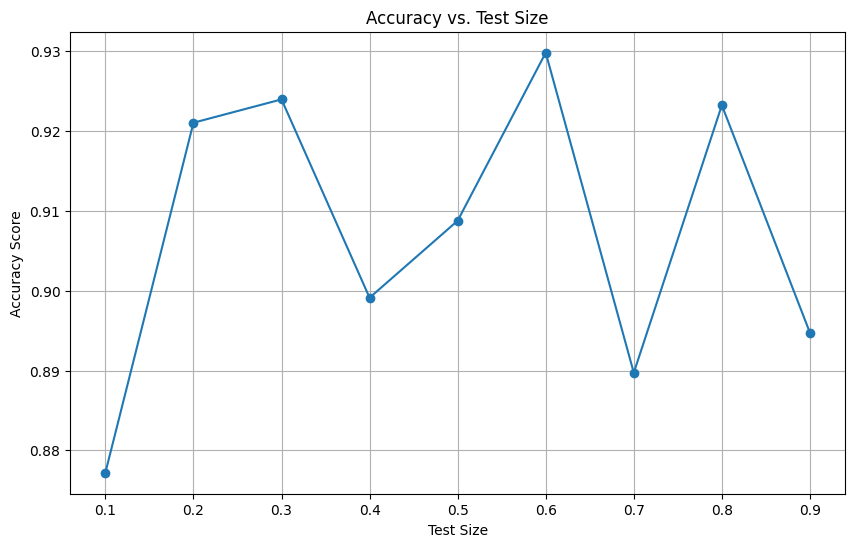

In [ ]:
test_sizes = np.arange(0.1, 1.0, 0.1)
accuracy_scores = []
for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=2)
    DescisionClassifier=DecisionTreeClassifier().fit(X_train,Y_train)
    Y_pred = DescisionClassifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.xticks(test_sizes)
plt.savefig('Breast_DT_accuracy_vs_test_size.png')

###COMPARISION AMONG CLASSIFIERS

In [ ]:
!pip install ucimlrepo
!pip install pandas

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
iris_Dataset = fetch_ucirepo(id=53)
breast_Cancer = fetch_ucirepo(id=17)
X_iris = pd.DataFrame(iris_Dataset.data.features, columns=iris_Dataset.data.feature_names)
Y_iris = pd.DataFrame(iris_Dataset.data.targets, columns=iris_Dataset.data.target_names)
iris_dataset = pd.concat([X_iris, Y_iris], axis=1)
x_breast = pd.DataFrame(breast_Cancer.data.features, columns=breast_Cancer.data.feature_names)
y_breast = pd.DataFrame(breast_Cancer.data.targets, columns=breast_Cancer.data.target_names)
breast_cancer = pd.concat([x_breast, y_breast], axis=1)
TEST_SIZE = 0.4
classifiers = {
    "MultinomialNB": MultinomialNB(),
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "DecisionTree": DecisionTreeClassifier(),
}
results = []
datasets = [
    {"name": "IRIS", "features": X_iris, "target": Y_iris},
    {"name": "BREAST_CANCER", "features": x_breast, "target": y_breast},
]
scaler = MinMaxScaler()
for dataset in datasets:
    X_train, X_test, Y_train, Y_test = train_test_split(dataset["features"], dataset["target"], test_size=TEST_SIZE, random_state=2)
    for clf_name, clf_model in classifiers.items():
        if clf_name == "MultinomialNB" and dataset["name"] == "BREAST_CANCER":
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            clf_model.fit(X_train_scaled, Y_train.values.ravel())
            Y_pred = clf_model.predict(X_test_scaled)
        else:
            clf_model.fit(X_train, Y_train.values.ravel())
            Y_pred = clf_model.predict(X_test)
        report = classification_report(Y_test, Y_pred, output_dict=True, zero_division=1)
        results.append({
            "TYPE": f"{dataset['name']}_{clf_name}",
            "accuracy": accuracy_score(Y_test, Y_pred),
            "precision": report["weighted avg"]["precision"],
            "recall": report["weighted avg"]["recall"],
            "f1 score": report["weighted avg"]["f1-score"],
            "support": report["weighted avg"]["support"],
        })
results_df = pd.DataFrame(results)
print("Classifier Performance Table:")
print(results_df)
print("\n=========================================")
print("Best Classifier Analysis:")
iris_results = results_df[results_df["TYPE"].str.contains("IRIS")]
best_iris = iris_results.loc[iris_results["accuracy"].idxmax()]
print(f"\nBest classifier for the IRIS dataset: {best_iris['TYPE']} with an accuracy of {best_iris['accuracy']:.4f}")
breast_results = results_df[results_df["TYPE"].str.contains("BREAST_CANCER")]
best_breast = breast_results.loc[breast_results["accuracy"].idxmax()]
print(f"Best classifier for the BREAST_CANCER dataset: {best_breast['TYPE']} with an accuracy of {best_breast['accuracy']:.4f}")
print("\n=========================================")
csv_filename = "classifier_performance_results.csv"
results_df.to_csv(csv_filename, index=False)

Classifier Performance Table:
                          TYPE  accuracy  precision    recall  f1 score  \
0           IRIS_MultinomialNB  0.766667   0.875556  0.766667  0.743841   
1              IRIS_GaussianNB  0.933333   0.937135  0.933333  0.933627   
2             IRIS_BernoulliNB  0.266667   0.804444  0.266667  0.112281   
3            IRIS_DecisionTree  0.950000   0.951127  0.950000  0.950148   
4  BREAST_CANCER_MultinomialNB  0.815789   0.846576  0.815789  0.801433   
5     BREAST_CANCER_GaussianNB  0.921053   0.921053  0.921053  0.921053   
6    BREAST_CANCER_BernoulliNB  0.614035   0.763004  0.614035  0.467201   
7   BREAST_CANCER_DecisionTree  0.894737   0.898458  0.894737  0.895477   

   support  
0     60.0  
1     60.0  
2     60.0  
3     60.0  
4    228.0  
5    228.0  
6    228.0  
7    228.0  

Best Classifier Analysis:

Best classifier for the IRIS dataset: IRIS_DecisionTree with an accuracy of 0.9500
Best classifier for the BREAST_CANCER dataset: BREAST_CANCER_Gauss

###DECISION TREE IMAGE (IRIS DATASET)

In [ ]:
from sklearn import tree
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
DescisionClassifier=DecisionTreeClassifier().fit(X_train,Y_train)
text_representation= tree.export_text(DescisionClassifier)
print(text_representation)

|--- feature_2 <= 2.35
|   |--- class: Iris-setosa
|--- feature_2 >  2.35
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



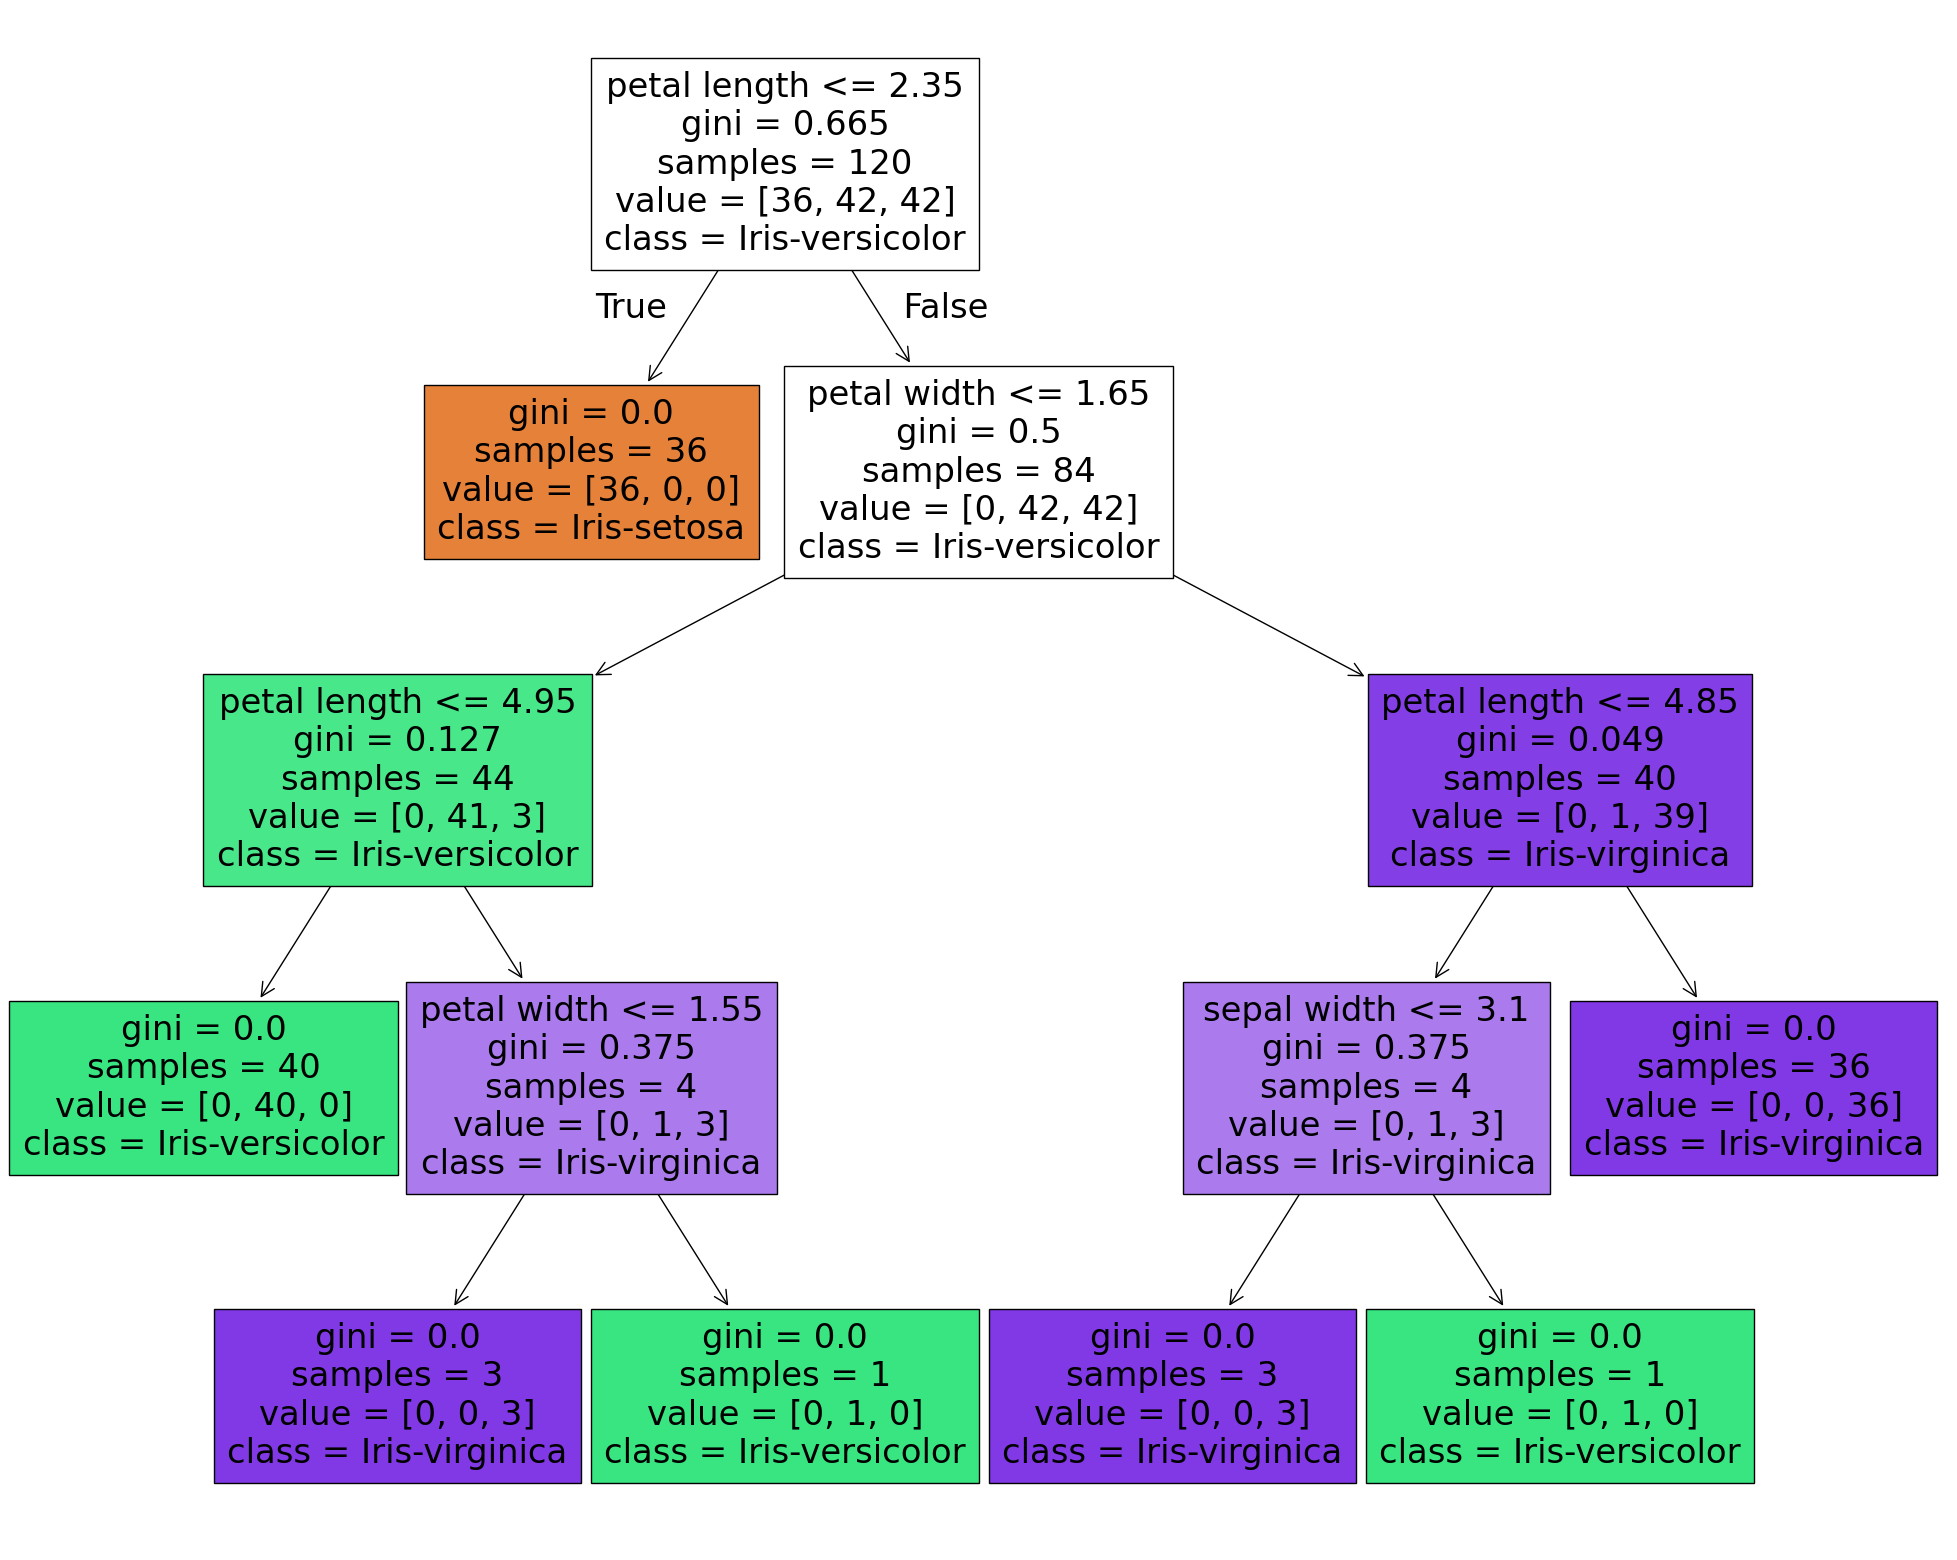

Decision Tree for Iris dataset saved as Iris_decision_tree.png


In [ ]:
from sklearn import tree
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
DescisionClassifier_iris = DecisionTreeClassifier().fit(X_train, Y_train)
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(DescisionClassifier_iris, feature_names=X.columns, class_names=[str(name) for name in Y[Y.columns[0]].unique()], filled=True)
fig.savefig('Iris_decision_tree_GINI.png')
plt.show()
plt.close(fig)
print("Decision Tree for Iris dataset saved as Iris_decision_tree.png")

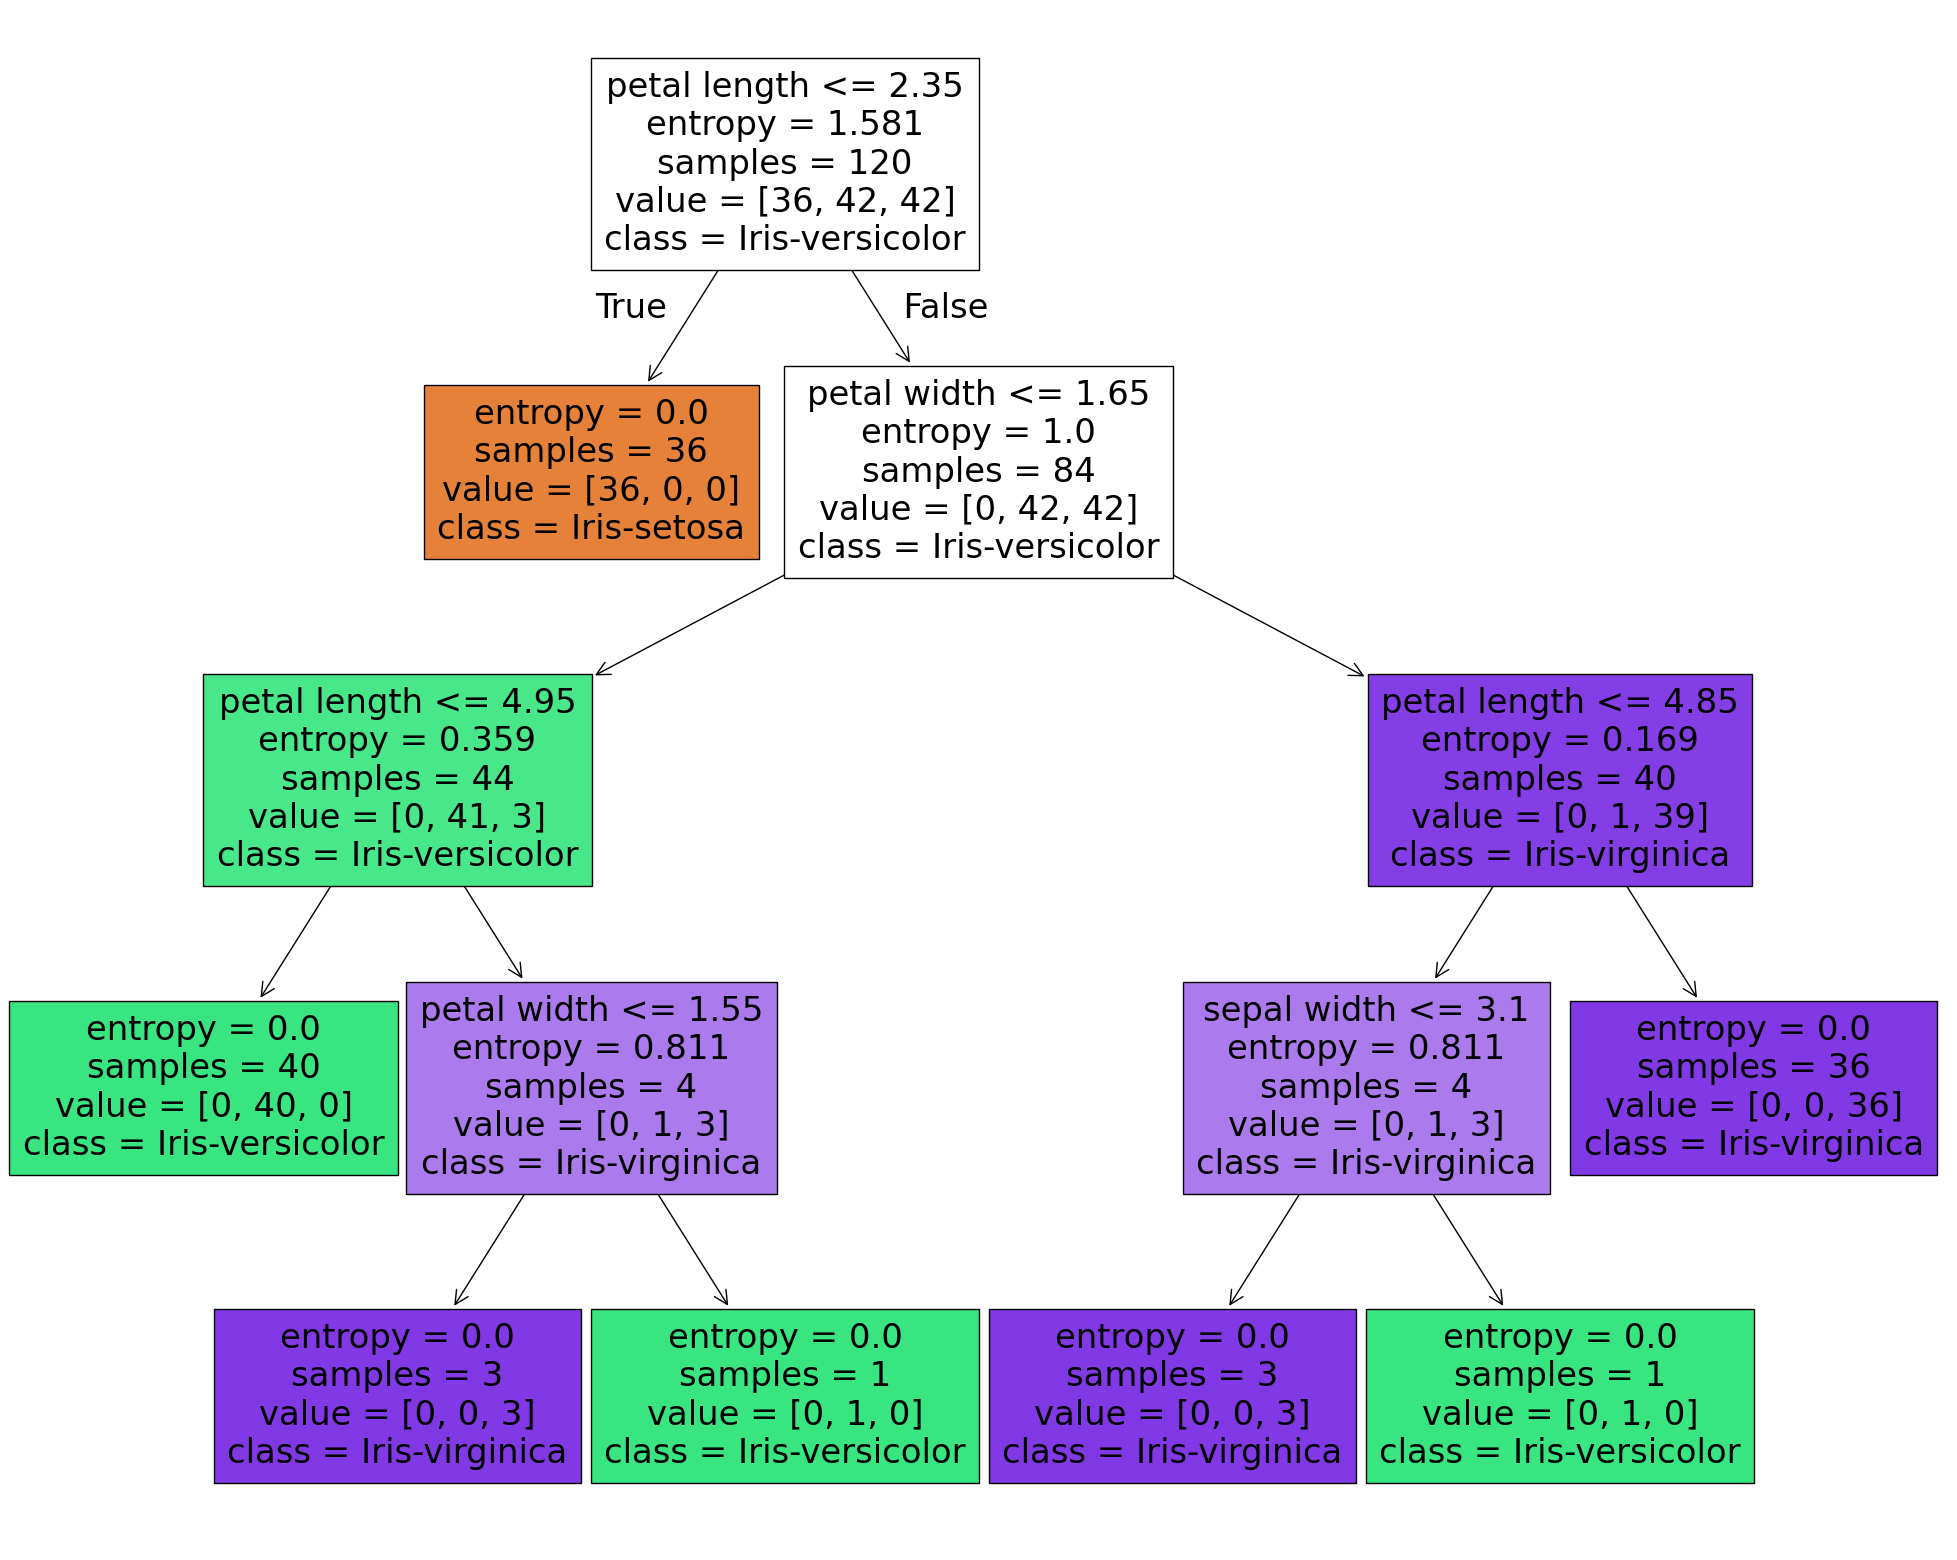

Decision Tree for Iris dataset saved as Iris_decision_tree.png


In [ ]:
from sklearn import tree
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
DescisionClassifier_iris = DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(DescisionClassifier_iris, feature_names=X.columns, class_names=[str(name) for name in Y[Y.columns[0]].unique()], filled=True)
fig.savefig('Iris_decision_tree_ENTROPY.png')
plt.show()
plt.close(fig)
print("Decision Tree for Iris dataset saved as Iris_decision_tree.png")

###DECISION TREE IMAGE (BREAST CANCER DATASET)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)
DescisionClassifier=DecisionTreeClassifier().fit(X_train,Y_train)
text_representation= tree.export_text(DescisionClassifier)
print(text_representation)

|--- feature_22 <= 105.95
|   |--- feature_27 <= 0.16
|   |   |--- feature_27 <= 0.14
|   |   |   |--- feature_13 <= 46.32
|   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |--- class: B
|   |   |   |--- feature_13 >  46.32
|   |   |   |   |--- feature_0 <= 12.27
|   |   |   |   |   |--- class: M
|   |   |   |   |--- feature_0 >  12.27
|   |   |   |   |   |--- class: B
|   |   |--- feature_27 >  0.14
|   |   |   |--- feature_1 <= 20.78
|   |   |   |   |--- class: B
|   |   |   |--- feature_1 >  20.78
|   |   |   |   |--- class: M
|   |--- feature_27 >  0.16
|   |   |--- feature_21 <= 23.47
|   |   |   |--- class: B
|   |   |--- feature_21 >  23.47
|   |   |   |--- class: M
|--- feature_22 >  105.95
|   |--- feature_22 <= 116.05
|   |   |--- feature_21 <= 20.36
|   |   |  

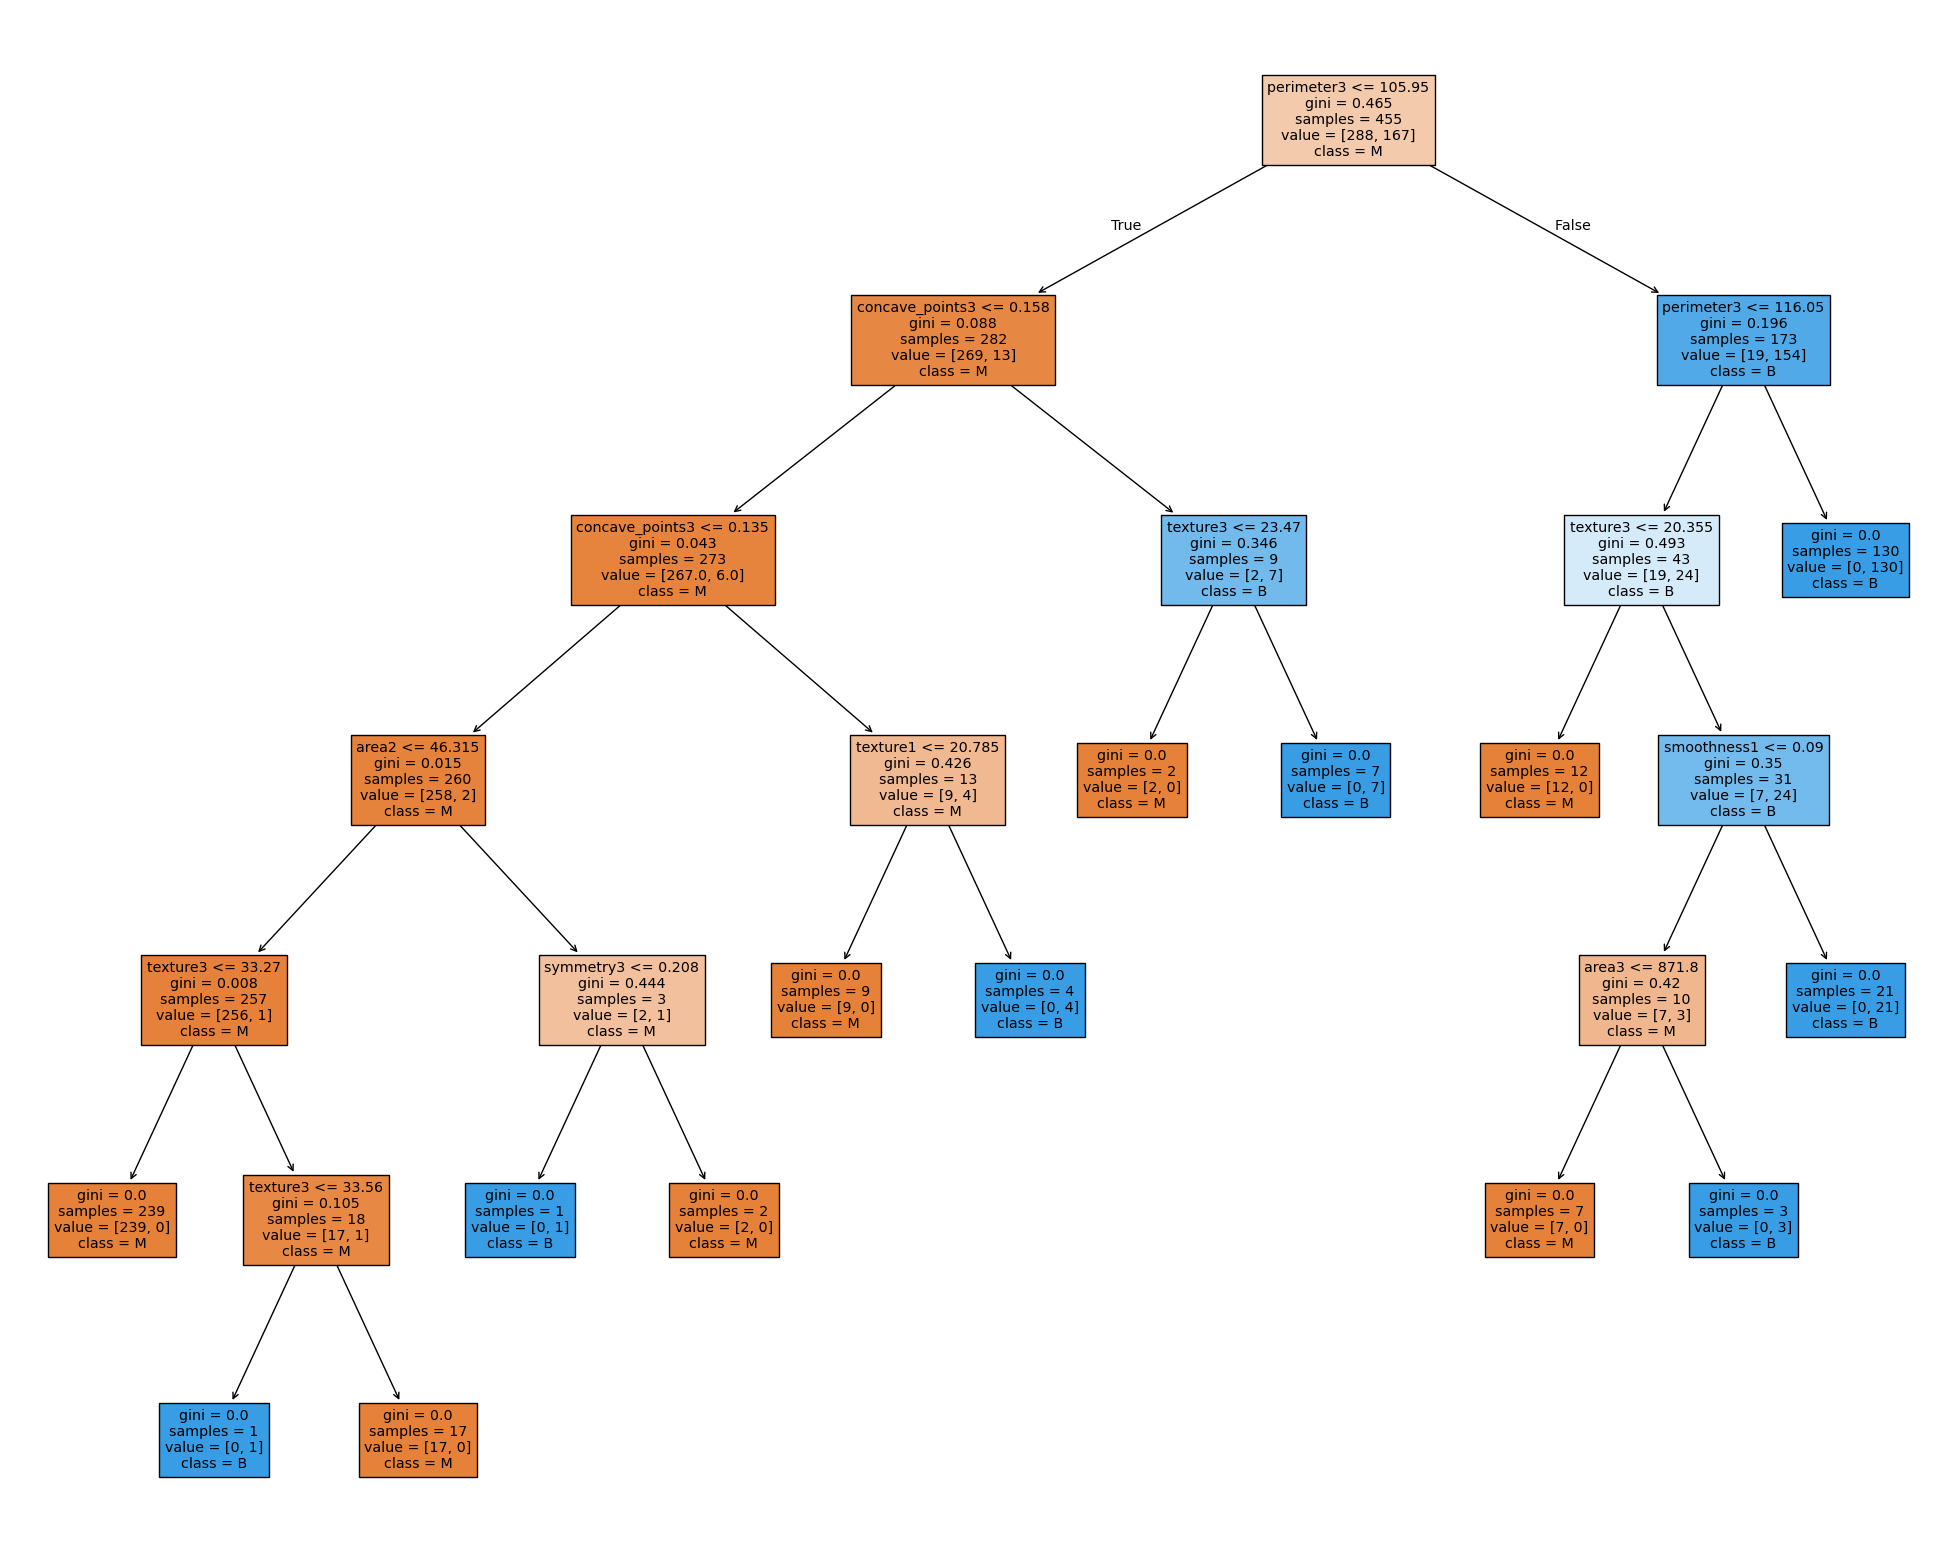

Decision Tree for Breast Cancer dataset saved as Breast_Cancer_decision_tree.png


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=2)
DescisionClassifier_breast = DecisionTreeClassifier().fit(X_train, Y_train)
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(DescisionClassifier_breast, feature_names=x.columns, class_names=[str(name) for name in y[y.columns[0]].unique()], filled=True)
fig.savefig('Breast_Cancer_decision_tree_GINI.png')
plt.show()
plt.close(fig)
print("Decision Tree for Breast Cancer dataset saved as Breast_Cancer_decision_tree.png")

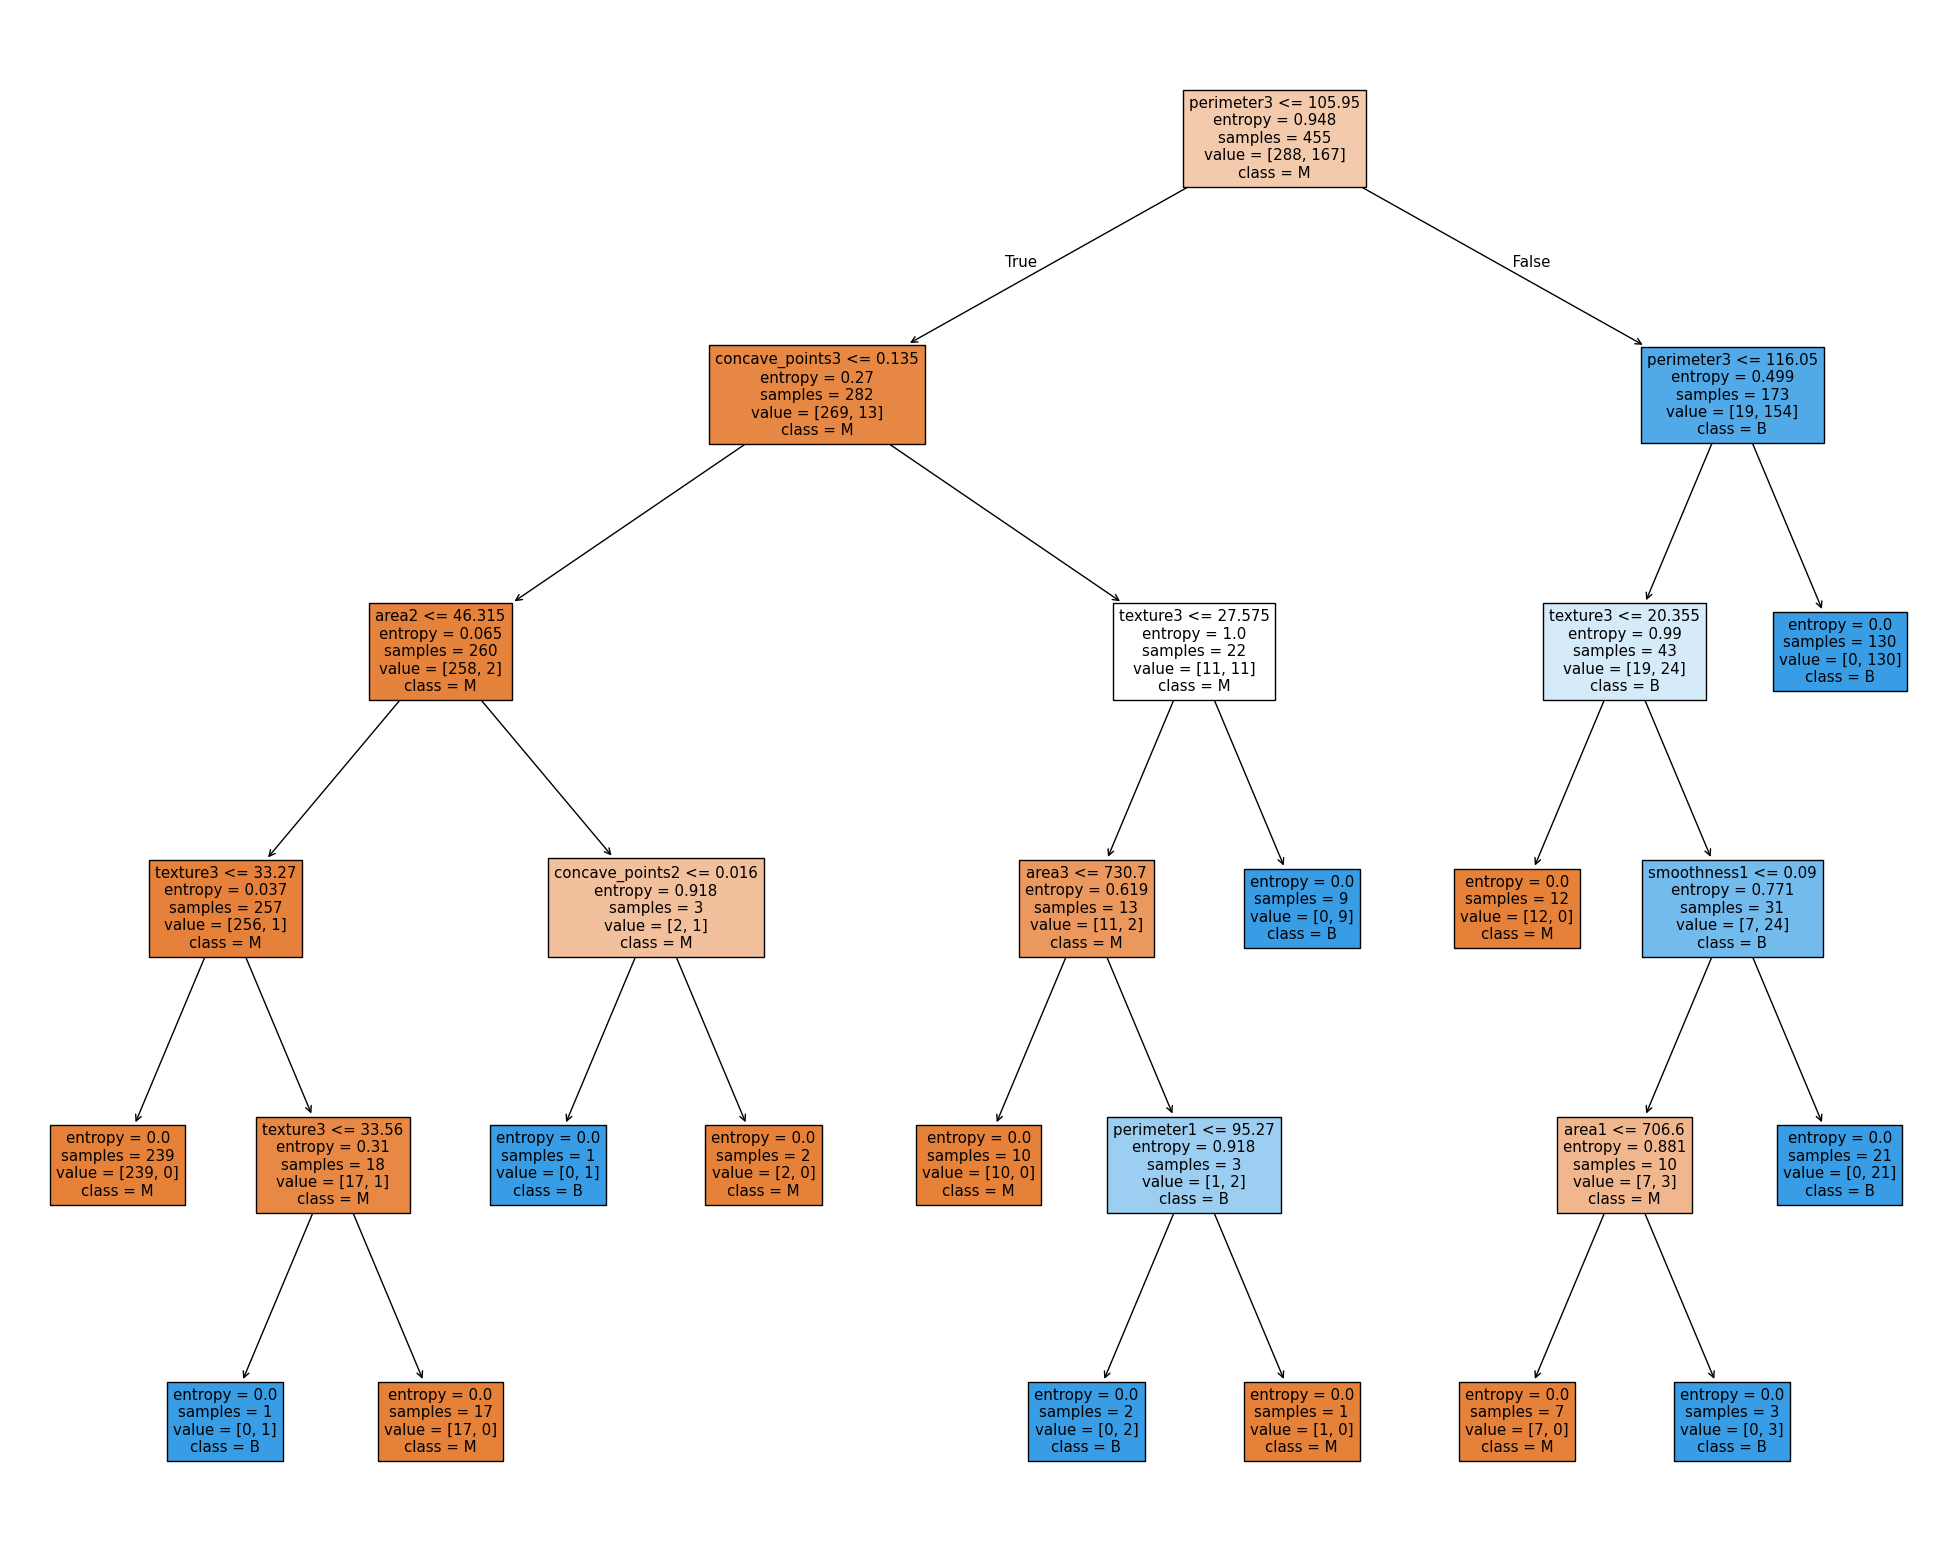

Decision Tree for Breast Cancer dataset saved as Breast_Cancer_decision_tree.png


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=2)
DescisionClassifier_breast = DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(DescisionClassifier_breast, feature_names=x.columns, class_names=[str(name) for name in y[y.columns[0]].unique()], filled=True)
fig.savefig('Breast_Cancer_decision_tree_ENTROPY.png')
plt.show()
plt.close(fig)
print("Decision Tree for Breast Cancer dataset saved as Breast_Cancer_decision_tree.png")

###HYPERPARAMTER TUNING (IRIS DATASET)

In [ ]:
import pprint
from sklearn.model_selection import GridSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, None],
    'min_samples_split': [2,0.1],
    'min_samples_leaf': [1,2],
    'min_weight_fraction_leaf': [0.0,0.1],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None,20],
    'min_impurity_decrease': [0.0,0.01],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0,0.01],
    'random_state': [42],
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, Y_train)
best_classifier = grid_search.best_estimator_
Y_predict = best_classifier.predict(X_test)
print("Tuned Decision Tree for Iris Dataset:")
print("Best Parameters:")
pprint.pprint(grid_search.best_params_)
print("Accuracy Score: ", accuracy_score(Y_test, Y_predict))
print("==================================================")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_predict))
print("==================================================")
print("Classification Report:\n", classification_report(Y_test, Y_predict))

Tuned Decision Tree for Iris Dataset:
Best Parameters:
{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}
Accuracy Score:  0.9333333333333333
Confusion Matrix:
 [[14  0  0]
 [ 0  7  1]
 [ 0  1  7]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
import pprint
from sklearn.model_selection import RandomizedSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 0.1],
    'min_samples_leaf': [1, 2, 4],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20],
    'min_impurity_decrease': [0.0, 0.01],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0, 0.01],
    'random_state': [42],
}
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, Y_train)
best_classifier = random_search.best_estimator_
Y_predict = best_classifier.predict(X_test)
print("Tuned Decision Tree for Iris Dataset (Randomized Search):")
print("Best Parameters:")
pprint.pprint(random_search.best_params_)
print("Accuracy Score: ", accuracy_score(Y_test, Y_predict))
print("==================================================")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_predict))
print("==================================================")
print("Classification Report:\n", classification_report(Y_test, Y_predict))

Tuned Decision Tree for Iris Dataset (Randomized Search):
Best Parameters:
{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}
Accuracy Score:  0.9666666666666667
Confusion Matrix:
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



###HYPERPARAMTER TUNING (BREAST CANCER DATASET)

In [ ]:
import pprint
from sklearn.model_selection import GridSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, None],
    'min_samples_split': [2,0.1],
    'min_samples_leaf': [1,2],
    'min_weight_fraction_leaf': [0.0,0.1],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None,20],
    'min_impurity_decrease': [0.0,0.01],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0,0.01],
    'random_state': [42],
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, Y_train)
best_classifier = grid_search.best_estimator_
Y_predict = best_classifier.predict(X_test)
print("Tuned Decision Tree for Breast Cancer Dataset:")
print("Best Parameters:")
pprint.pprint(grid_search.best_params_)
print("Accuracy Score: ", accuracy_score(Y_test, Y_predict))
print("==================================================")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_predict))
print("==================================================")
print("Classification Report:\n", classification_report(Y_test, Y_predict))

Tuned Decision Tree for Breast Cancer Dataset:
Best Parameters:
{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'random'}
Accuracy Score:  0.9210526315789473
Confusion Matrix:
 [[62  7]
 [ 2 43]]
Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.90      0.93        69
           M       0.86      0.96      0.91        45

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



In [ ]:
import pprint
from sklearn.model_selection import RandomizedSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 0.1],
    'min_samples_leaf': [1, 2, 4],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20],
    'min_impurity_decrease': [0.0, 0.01],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0, 0.01],
    'random_state': [42],
}
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, Y_train)
best_classifier = random_search.best_estimator_
Y_predict = best_classifier.predict(X_test)
print("Tuned Decision Tree for Breast Cancer Dataset (Randomized Search):")
print("Best Parameters:")
pprint.pprint(random_search.best_params_)
print("Accuracy Score: ", accuracy_score(Y_test, Y_predict))
print("==================================================")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_predict))
print("==================================================")
print("Classification Report:\n", classification_report(Y_test, Y_predict))

Tuned Decision Tree for Breast Cancer Dataset (Randomized Search):
Best Parameters:
{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'random'}
Accuracy Score:  0.9035087719298246
Confusion Matrix:
 [[59 10]
 [ 1 44]]
Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.86      0.91        69
           M       0.81      0.98      0.89        45

    accuracy                           0.90       114
   macro avg       0.90      0.92      0.90       114
weighted avg       0.92      0.90      0.90       114

